In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('/content/train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [11]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


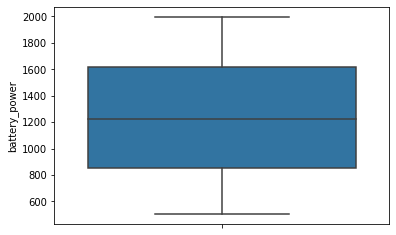

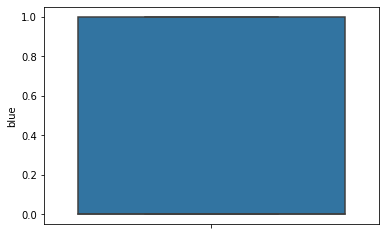

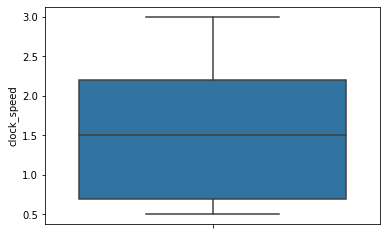

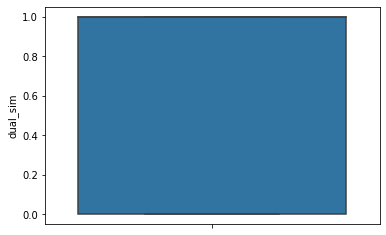

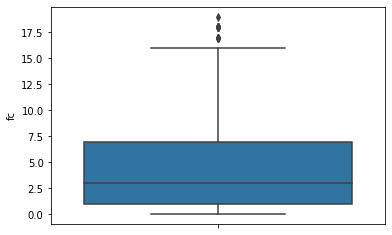

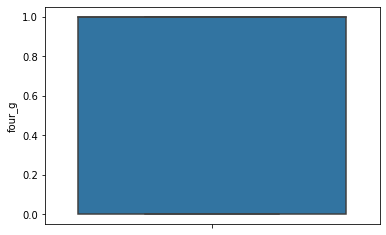

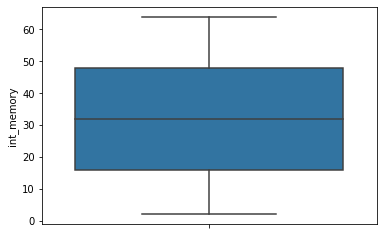

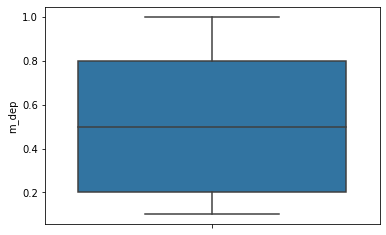

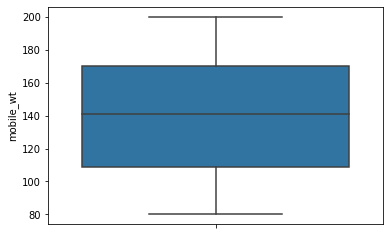

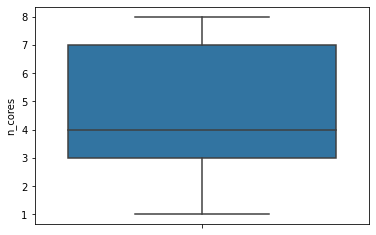

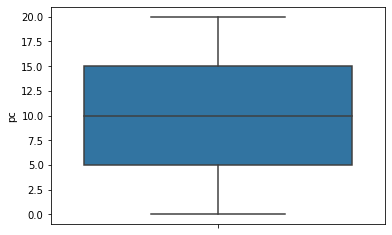

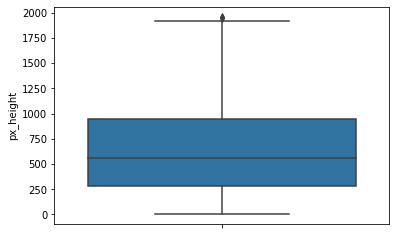

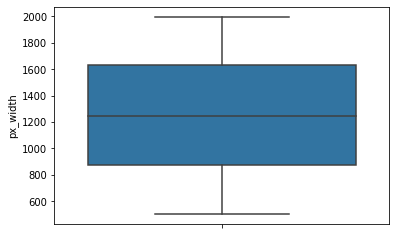

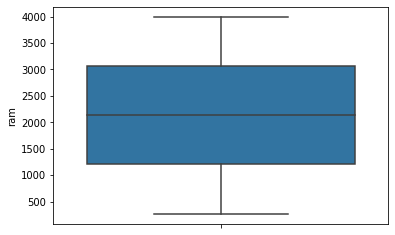

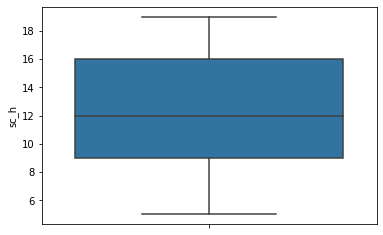

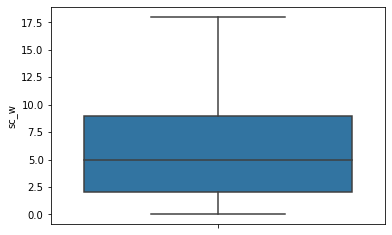

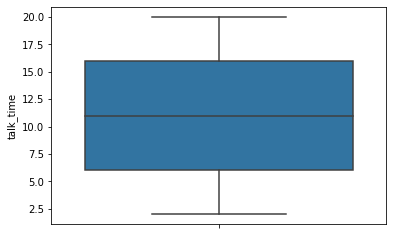

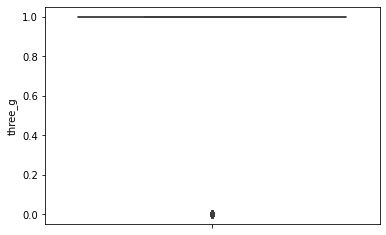

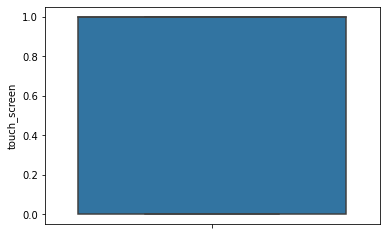

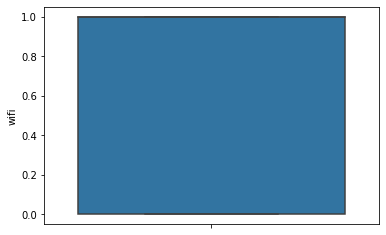

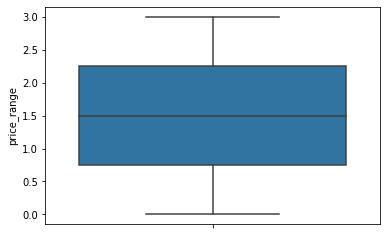

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
columns=df.columns
for col in columns:
    plt.figure()
    sns.boxplot(y=df[col])

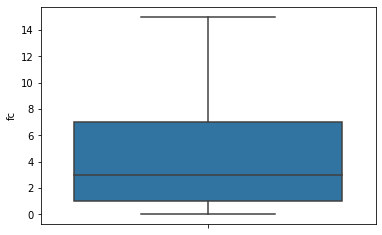

In [13]:
df.drop(df[df['fc']>15].index,axis=0,inplace=True)
sns.boxplot(y=df['fc'])

In [64]:
x=df.drop('price_range',axis=1).values
y=df['price_range'].values
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.90035658, -0.99186151,  0.83496726, ..., -1.77931376,
        -1.0061476 ,  0.99592251],
       [-0.49284008,  1.00820527, -1.24953886, ...,  0.56201443,
         0.99388996, -1.00409418],
       [-1.53553594,  1.00820527, -1.24953886, ...,  0.56201443,
         0.99388996, -1.00409418],
       ...,
       [ 1.53335931, -0.99186151, -0.75906683, ...,  0.56201443,
         0.99388996, -1.00409418],
       [ 0.62498453, -0.99186151, -0.75906683, ...,  0.56201443,
         0.99388996,  0.99592251],
       [-1.65619725,  1.00820527,  0.58973124, ...,  0.56201443,
         0.99388996,  0.99592251]])

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [76]:
import keras
from keras.models import Sequential
from keras.layers import Dense

clf = Sequential()
clf.add(Dense(8, activation='relu', input_shape=(20,)))
clf.add(Dense(units = 6, activation = 'relu'))
clf.add(Dense(units = 4, activation = 'sigmoid'))
clf.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ['accuracy'])
clf.fit(x_train, y_train, epochs=100, batch_size = 10,validation_data=[x_test, y_test])

Epoch 1/100
157/157 [==============================] - 2s 6ms/step - loss: 0.6494 - accuracy: 0.2458 - val_loss: 0.6116 - val_accuracy: 0.2270
Epoch 2/100
157/157 [==============================] - 1s 5ms/step - loss: 0.5986 - accuracy: 0.2484 - val_loss: 0.5834 - val_accuracy: 0.1990
Epoch 3/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.2784 - val_loss: 0.5687 - val_accuracy: 0.2526
Epoch 4/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5625 - accuracy: 0.3103 - val_loss: 0.5559 - val_accuracy: 0.3189
Epoch 5/100
157/157 [==============================] - 0s 2ms/step - loss: 0.5454 - accuracy: 0.3602 - val_loss: 0.5345 - val_accuracy: 0.3724
Epoch 6/100
157/157 [==============================] - 1s 3ms/step - loss: 0.5139 - accuracy: 0.4374 - val_loss: 0.4904 - val_accuracy: 0.4413
Epoch 7/100
157/157 [==============================] - 1s 5ms/step - loss: 0.4539 - accuracy: 0.5358 - val_loss: 0.4180 - val_accuracy: 0.5969